# Python Homework 2

**Release date:** Saturday, April 18<br>
**Due date:** Friday, __May 8 (!)__, at midnight via <font color="blue">Gradescope</font> 

**Instruction:** Please upload your jupyter notebook on <font color="blue">Gradescope</font> with filename __PythonHW2_YOURPERMNUMBER.ipynb__.


Load some packages:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import expm, sinm, cosm
import scipy.linalg as la

## Problem 1 (10 Points)

Consider the continuous-time __Registration Line Markov Chain__ from Example 2.13 (Lecture 7).

1. Implement a simulation of this Markov chain on the time interval $[0,60]$. 

In [15]:
arrival = 0
service = 0
state = 0
chainPath = []
chainPath.append(state)

while len(chainPath) < 60:
    arrival = np.random.poisson(0.25)
    service = np.random.poisson(0.2)
    outcome = arrival - service 
    state = state + outcome
    if state < 0:
        state = 0
    if state > 4:
        state = 4
    chainPath.append(state)

2. Plot a trajectory of this Markov Chain on $[0,60]$ by using your code from 1.

<i>Hint:</i> You can use the <tt>plt.hlines()</tt> command to plot horizontal lines (check also the documentation online).

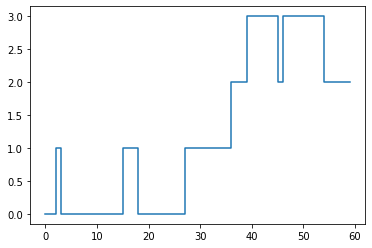

In [16]:
plt.step(range(60), chainPath)
plt.show()

3. Compute the transition function $P(t)$ at $t = \pi$.

*Hint:* Use a suitable function from the <tt>scipy.linalg</tt> package (check also the documentation online).

In [18]:
Q = np.matrix([[-1/4, 1/4, 0, 0, 0],
                  [1/5, -9/20, 1/4, 0, 0],
                  [1/5, -9/20, 1/4, 0, 0],
                  [0, 0, 1/5, -9/20, 1/4],
                  [0, 0, 0, 1/5, -1/5]])

expm(math.pi*Q)

array([[ 0.57957642,  0.21765992,  0.20276366,  0.        ,  0.        ],
       [ 0.33633886,  0.0404739 ,  0.62318724,  0.        ,  0.        ],
       [ 0.33633886, -0.9595261 ,  1.62318724,  0.        ,  0.        ],
       [ 0.08476434, -0.22493574,  0.49961644,  0.3260868 ,  0.31446816],
       [ 0.01848494, -0.04692438,  0.13630995,  0.25157452,  0.64055496]])

4. Compute the stationary distribution of this continuous-time Markov chain.

*Hint:* Use suitable functions from the <tt>numpy.linalg package</tt> (check also the documentation online).

In [19]:
v = la.eig(Q, left=True, right=False)[1][:,0]
v/sum(v)

array([ 3.97460274e+14, -6.80569268e+14,  2.24271831e+13,  7.57507153e+14,
       -4.96825342e+14])

## Problem 2 (10 Points)

Multistate Markov models are used in medicine to model the course of diseases. A patient may advance into, or recover from, successively more severe stages of a disease until some terminal state. Each stage represents a state of an absorbing continuous-time Markov chain. 

Bartolomeo et al. (2011) develop such a model to study the progression of liver disease among patients diagnosed with cirrhosis of the liver. The general form of the infinitesimal generator matrix $Q$ for their three-parameter model is

$$ Q = \begin{pmatrix} -(q_{12} + q_{13}) & q_{12} & q_{13} \\ 0 & -q_{23} & q_{23} \\ 0 & 0 & 0 \end{pmatrix}  $$

where state 1 represents cirrhosis, state 2 denotes liver cancer, and state 3 is death.

1. Starting from the first stage ("cirrhosis"), estimate the mean time to death (i.e. ending up in stage 3) by running 100,000 simulations. Use the transition rates

$$ q_{12} = 0.0151, \quad q_{13} = 0.0071, \quad q_{23} = 0.0284.$$

In [6]:
simulated_values = []
for i in range(100000):
    state = 1
    t = 0
    while True:
        if state == 1:
            q12 = np.random.exponential(1/0.0151)
            q13 = np.random.exponential(1/0.0071)
            if q12 < q13:
                t = t + q12
                state = 2
            else:
                t = t + q13
                break
        if state == 2:
            q23 = np.random.exponential(1/0.0284)
            t = t + q23
            break
    simulated_values.append(t)

np.mean(simulated_values)

69.04947232661571

2. Compare your approximation from 1. with the exact theoretical mean time to death (implement a suitable formula from class).  

In [8]:
# From F = -V^(-1)
q12 = 0.0151
q13 = 0.0071
q23 = 0.0284
a1 = 1/(q12+q13)+q12/(q23*(q12+q13))
a1

68.99505138941758